A way to predict which students won't meet the minimum standard.


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

sns.set_style('whitegrid')
sns.set_palette("husl")

%matplotlib inline

In [2]:
y7_2012_y9_2014 = pd.read_csv('y7_2012_y9_2014_2.csv' )
y7_2013_y9_2015 = pd.read_csv('y7_2013_y9_2015_2.csv' )
y7_2014_y9_2016 = pd.read_csv('y7_2014_y9_2016_2.csv' )
y7_2015_y9_2017 = pd.read_csv('y7_2015_y9_2017_2.csv' )
# need to predict
y7_2016 = pd.read_csv('./NAPLAN/naplan_schoolexportYr7_2016.csv')
y7_2016.drop([113,186],inplace=True)
y7_2017 = pd.read_csv('./NAPLAN/naplan_schoolexportYr7_2017.csv')





In [3]:
X_y7_2012 = pd.read_csv('X_y7_2012_2.csv')
X_y7_2013 = pd.read_csv('X_y7_2013_2.csv')
X_y7_2014 = pd.read_csv('X_y7_2014_2.csv')
X_y7_2015 = pd.read_csv('X_y7_2015_2.csv')
X_y7_2016 = pd.read_csv('X_y7_2016.csv')
X_y7_2017 = pd.read_csv('X_y7_2017.csv')

In [4]:
yc2012 = y7_2012_y9_2014['Band Year 9: Numeracy'] >=8
yc2013 = y7_2013_y9_2015['Band Year 9: Numeracy'] >=8
yc2014 = y7_2014_y9_2016['Band Year 9: Numeracy'] >=8
yc2015 = y7_2015_y9_2017['Band Year 9: Numeracy'] >=8

yr2012 = y7_2012_y9_2014['Band Year 9: Numeracy'] 
yr2013 = y7_2013_y9_2015['Band Year 9: Numeracy']
yr2014 = y7_2014_y9_2016['Band Year 9: Numeracy'] 
yr2015 = y7_2015_y9_2017['Band Year 9: Numeracy'] 

In [5]:
band2012 = y7_2012_y9_2014['Band Year 7: Numeracy'] #>=8
band2013 = y7_2013_y9_2015['Band Year 7: Numeracy'] #>=8
band2014 = y7_2014_y9_2016['Band Year 7: Numeracy'] #>=8
band2015 = y7_2015_y9_2017['Band Year 7: Numeracy'] #>=8
band2016 = y7_2016['Band Year 7: Numeracy']
band2017 = y7_2017['Band Year 7: Numeracy']
band2012_y5 = y7_2012_y9_2014['Previous Band Year 5: Numeracy']
band2013_y5 = y7_2013_y9_2015['Previous Band Year 5: Numeracy']
band2014_y5 = y7_2014_y9_2016['Previous Band Year 5: Numeracy']
band2015_y5 = y7_2015_y9_2017['Previous Band Year 5: Numeracy']
band2016_y5 = y7_2016['Previous Band Year 5: Numeracy']
band2017_y5 = y7_2017['Previous Band Year 5: Numeracy']

In [6]:
# verbes
X_y7_2012_v = pd.read_csv('X_y7_2012_verbes_2.csv')
X_y7_2013_v = pd.read_csv('X_y7_2013_verbes_2.csv')
X_y7_2014_v = pd.read_csv('X_y7_2014_verbes_2.csv')
X_y7_2015_v = pd.read_csv('X_y7_2015_verbes_2.csv')
X_y7_2016_v = pd.read_csv('X_y7_2016_verbes_2.csv')
X_y7_2017_v = pd.read_csv('X_y7_2017_verbes_2.csv')

In [7]:
X_y7_2012.index = y7_2012_y9_2014.SRN
X_y7_2013.index = y7_2013_y9_2015.SRN
X_y7_2014.index = y7_2014_y9_2016.SRN
X_y7_2015.index = y7_2015_y9_2017.SRN
X_y7_2016.index = y7_2016.SRN
X_y7_2017.index = y7_2017.SRN
X_y7_2012_v.index = y7_2012_y9_2014.SRN
X_y7_2013_v.index = y7_2013_y9_2015.SRN
X_y7_2014_v.index = y7_2014_y9_2016.SRN
X_y7_2015_v.index = y7_2015_y9_2017.SRN
X_y7_2016_v.index = y7_2016.SRN
X_y7_2017_v.index = y7_2017.SRN

In [8]:
yc = pd.DataFrame(pd.concat([yc2012,yc2013,yc2014]))
yr = pd.DataFrame(pd.concat([yr2012,yr2013,yr2014]))
yc1 = pd.DataFrame(pd.concat([yc2012,yc2013,yc2014,yc2015]))
yr1 = pd.DataFrame(pd.concat([yr2012,yr2013,yr2014,yr2015]))

In [9]:
yc.shape

(576, 1)

In [10]:
syllabus_dict = {'MA1-11MG':'Volume and Capacity', 'MA1-8NA':'Patterns and Algebra', 
                 'MA2-11MG':'Volume and Capacity', 'MA2-12MG':'Mass', 'MA2-13MG':'Time', 
                 'MA2-14MG':'Three-Dimensional Space', 'MA2-15MG':'Two-Dimensional Space',
                 'MA2-16MG':'Angles', 'MA2-17MG':'Position', 'MA2-18SP':'Data','MA2-19SP':'Chance',
                 'MA2-4NA':'Whole Numbers', 'MA2-5NA':'Addition and Subtraction', 'MA2-6NA':'Multiplication and Division', 
                 'MA2-7NA':'Fractions and Decimals', 'MA2-8NA':'Patterns and Algebra', 
                 'MA3-10MG':'Area', 'MA3-11MG':'Volume and Capacity', 'MA3-12MG':'Mass', 'MA3-13MG':'Time', 'MA3-14MG':'Three-Dimensional Space', 'MA3-15MG':'Two-Dimensional Space', 
                 'MA3-16MG':'Angles', 'MA3-17MG':'Position', 'MA3-18SP':'Data', 
                 'MA3-19SP':'Chance', 'MA3-4NA':'Whole Numbers', 
                 'MA3-5NA':'Addition and Subtraction', 'MA3-6NA':'Multiplication and Division',
                 'MA3-7NA':'Fractions, Decimals and Percentages', 'MA3-8NA':'Patterns and Algebra', 
                 'MA3-9MG':'Length', 'MA4-10NA':'Equations', 'MA4-11NA':'Linear Relationships', 
                 'MA4-12MG':'Length', 'MA4-13MG':'Area', 'MA4-14MG':'Volume','MA4-15MG':'Time', 
                 'MA4-17MG':'Properties of Geometrical Figures', 'MA4-18MG':'Angles','MA4-19SP':'Data Collection and Representation', 
                 'MA4-20SP':'Single Variable Data Analysis', 'MA4-21SP':'Probability', 
                  'MA4-4NA':'Computation with Integers', 'MA4-5NA':'Fractions, Decimals and Percentages', 
                 'MA4-6NA':'Financial Mathematics', 'MA4-7NA':'Ratios and Rates', 
                 'MA4-8NA':'Algebraic Techniques', 'MA4-9NA':'Indices'}

In [11]:
scores = pd.DataFrame(index = ['accuracy','roc_auc_score','f1_score','precision_score',
                                'TN','FP','FN','TP'])
scores

""
accuracy
roc_auc_score
f1_score
precision_score
TN
FP
FN
TP


# analysis the data according to the syllabus

Target: >= Band 8 or < band 8 in Y9 Naplan test

Score: to evaluate and test model

roc_auc_score, precision_score

train_split_test

Need to min the False Positive value.(Actual < 8 band, predict >= 8 band)

So use precision and ROC plot to check the model.
precision = (tp) / (tp + fp)



In [12]:
scores = pd.DataFrame(index = ['accuracy','roc_auc_score','f1_score','precision_score',
                                'TN','FP','FN','TP'])
scores

""
accuracy
roc_auc_score
f1_score
precision_score
TN
FP
FN
TP


In [13]:
df2 = pd.concat([X_y7_2012,X_y7_2013,X_y7_2014,X_y7_2015,X_y7_2016,X_y7_2017])

In [14]:
# create new columns
new_columns = [syllabus_dict.get(i,0) for i in list(df2.columns) ]

In [15]:
df2.columns = new_columns

In [16]:
df3 = df2.T.reset_index().groupby(['index']).apply(np.mean)

In [17]:
# fill na with mean value of each student
df4 = df3.T.fillna(df3.T.mean())

In [18]:
y7band = pd.concat([band2012,band2013,band2014,band2015,band2016,band2017])
y5band = pd.concat([band2012_y5,band2013_y5,band2014_y5,band2015_y5,band2016_y5,band2017_y5])
df4['y7_band'] = list(y7band/10)
#df4['y5_band'] = list(y5band)

In [19]:
df4.head()

index,Addition and Subtraction,Algebraic Techniques,Angles,Area,Chance,Computation with Integers,Data,Data Collection and Representation,Equations,Financial Mathematics,...,Properties of Geometrical Figures,Ratios and Rates,Single Variable Data Analysis,Three-Dimensional Space,Time,Two-Dimensional Space,Volume,Volume and Capacity,Whole Numbers,y7_band
SRN,,,,,,,,,,,,,,,,,,,,,
436530790,0.741886,0.617984,0.5,0.5,0.833333,1.0,0.50,0.491803,1.0,0.483498,...,0.0,0.534686,0.415842,0.75,0.333333,0.9,0.942857,0.0,1.0,0.7
441546149,0.741886,0.617984,1.0,0.5,1.000000,1.0,1.00,0.491803,1.0,0.483498,...,0.0,0.534686,0.415842,0.75,0.833333,0.9,0.942857,0.0,1.0,0.9
432640256,0.741886,0.617984,0.5,0.0,1.000000,1.0,0.75,0.491803,0.0,0.483498,...,1.0,0.534686,0.415842,1.00,0.500000,0.8,0.942857,0.0,0.0,0.7
434220173,0.741886,0.617984,0.5,0.5,0.500000,1.0,0.75,0.491803,1.0,0.483498,...,0.0,0.534686,0.415842,0.75,0.333333,1.0,0.942857,0.0,0.0,0.7
431672294,0.741886,0.617984,0.5,0.5,1.000000,1.0,1.00,0.491803,1.0,0.483498,...,0.0,0.534686,0.415842,1.00,0.833333,1.0,0.942857,0.0,1.0,0.9


In [20]:
df4.shape

(1178, 30)

In [21]:
yc1.shape

(762, 1)

**Train test split**

In [22]:
# train test split
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(df4[:762],yc1,
                              
                                                     random_state = 233)

In [23]:
y_train2['Band Year 9: Numeracy'].value_counts()

True     486
False     85
Name: Band Year 9: Numeracy, dtype: int64

## Decision tree

In [24]:
import sklearn.tree
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train2, y_train2)
print dtc.score(X_test2, y_test2)

0.874345549738


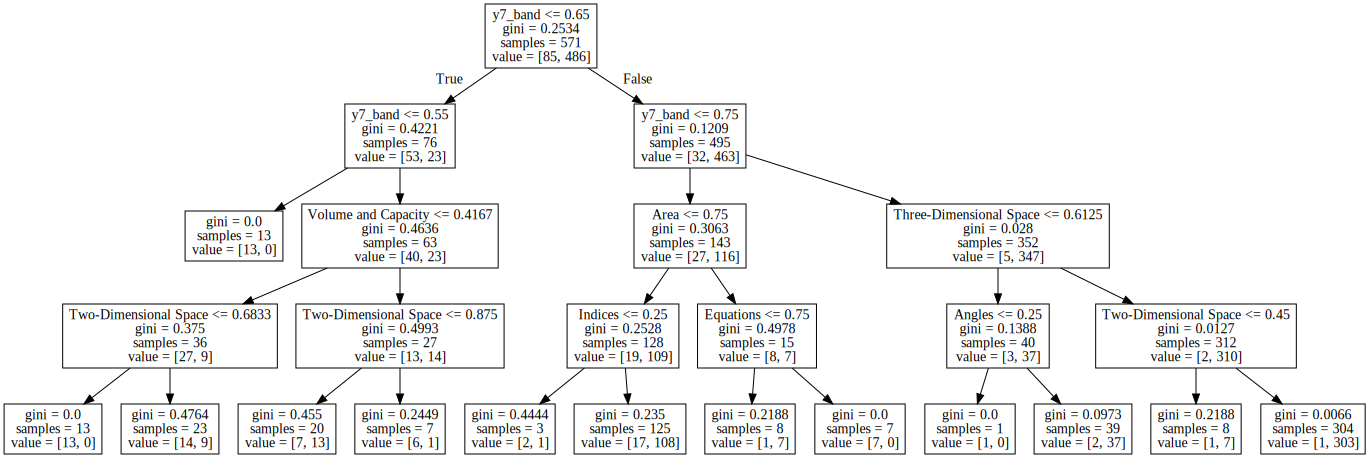

In [25]:
%matplotlib inline
import graphviz
dot_data = sklearn.tree.export_graphviz(dtc, out_file=None,feature_names=X_train2.columns) 
graph = graphviz.Source(dot_data) 
graph

In [26]:
y_pred = dtc.predict(X_test2)
Y_pp = pd.DataFrame(dtc.predict_proba(X_test2), columns=['class_0_pp','class_1_pp'])
from sklearn.metrics import roc_auc_score
print roc_auc_score(y_test2, Y_pp.class_1_pp)
from sklearn.metrics import f1_score
print f1_score(y_test2, y_pred)
from sklearn.metrics import precision_score
print precision_score(y_test2, y_pred)

0.863004032258
0.928143712575
0.890804597701


In [27]:
import sklearn.metrics 
sklearn.metrics.confusion_matrix(y_test2, y_pred)

array([[ 12,  19],
       [  5, 155]])

In [28]:
tn, fp, fn, tp =sklearn.metrics.confusion_matrix(y_test2, 
                                                 y_pred).ravel()



In [29]:
Y_pp = pd.DataFrame(dtc.predict_proba(X_test2), columns=['class_0_pp','class_1_pp'])
scores['dtc_syllabus'] = [dtc.score(X_test2, y_test2),
                               roc_auc_score(y_test2, Y_pp.class_1_pp),
                               f1_score(y_test2, y_pred),
                               precision_score(y_test2, y_pred),
                               tn, fp, fn, tp
                              ]

## random forest

In [151]:
import sklearn.ensemble

rf = sklearn.ensemble.RandomForestClassifier() 
rf.fit(X_train2, y_train2) 
y_pred = rf.predict(X_test2)
rf.score(X_test2, y_test2)

/Users/shirleywang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.86910994764397909

In [152]:
y_pred = rf.predict(X_test2)
from sklearn.metrics import roc_auc_score
print roc_auc_score(y_test2, y_pred)
from sklearn.metrics import f1_score
print f1_score(y_test2, y_pred)
from sklearn.metrics import average_precision_score
print average_precision_score(y_test2, y_pred)

0.726814516129
0.923076923077
0.949473465017


In [153]:
import sklearn.metrics 
sklearn.metrics.confusion_matrix(y_test2, y_pred)

array([[ 16,  15],
       [ 10, 150]])

### Find the best Parameter for rf


In [154]:
import sklearn.ensemble
grid3 = sklearn.model_selection.GridSearchCV(
    sklearn.ensemble.RandomForestClassifier(),
    param_grid = {'max_depth': [1,2,3,4,5,6], 
                  'criterion': ['gini', 'entropy'],
                  'min_samples_leaf': [1,2,3,4,5],
                  'min_samples_split': [2,3,4,5,6]
                 },
    cv=6    
)
grid3.fit(X_train2,y_train2['Band Year 9: Numeracy'])
print grid3.best_score_
print grid3.best_params_

KeyboardInterrupt: 

In [481]:
best_rf = grid3.best_estimator_
# predict and score
y_pred = best_rf.predict(X_test2)
best_rf.score(X_test2, y_test2)

0.90340909090909094

In [482]:
from sklearn.metrics import roc_auc_score
print roc_auc_score(y_test2, y_pred)
from sklearn.metrics import f1_score
print f1_score(y_test2, y_pred)
from sklearn.metrics import average_precision_score
print average_precision_score(y_test2, y_pred)

0.819444444444
0.941580756014
0.961567202639


In [483]:
import sklearn.metrics 
sklearn.metrics.confusion_matrix(y_test2, y_pred)

array([[ 22,  10],
       [  7, 137]])

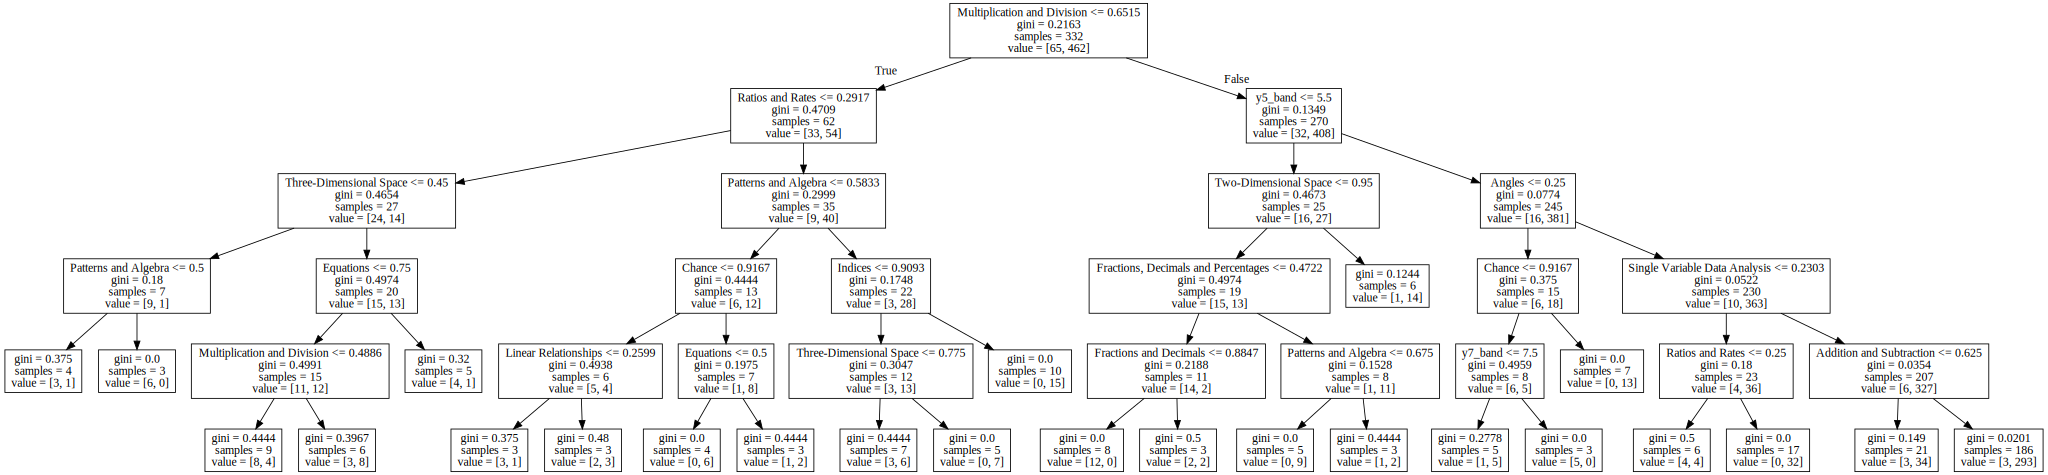

In [484]:
%matplotlib inline
import graphviz
dot_data = sklearn.tree.export_graphviz(best_rf.estimators_[5], out_file=None,feature_names=X_train2.columns) 
graph = graphviz.Source(dot_data) 
graph

In [45]:
tn, fp, fn, tp =sklearn.metrics.confusion_matrix(y_test2, 
                                                 y_pred).ravel()



In [94]:
Y_pp = pd.DataFrame(rf.predict_proba(X_test2), columns=['class_0_pp','class_1_pp'])
scores['rf_syllabus'] = [rf.score(X_test2, y_test2),
                               roc_auc_score(y_test2, Y_pp.class_1_pp),
                               f1_score(y_test2, y_pred),
                               precision_score(y_test2, y_pred),
                               tn, fp, fn, tp
                              ]

## knn

In [156]:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train2, y_train2) 
y_pred = knn.predict(X_test2)
knn.score(X_test2, y_test2)

/Users/shirleywang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.84293193717277481

In [161]:

from sklearn.metrics import f1_score
print f1_score(y_test2, y_pred)
from sklearn.metrics import average_precision_score
print average_precision_score(y_test2, y_pred)

0.91124260355
0.929541075946


In [162]:
import sklearn.metrics 
sklearn.metrics.confusion_matrix(y_test2, y_pred)

array([[  7,  24],
       [  6, 154]])

In [163]:
tn, fp, fn, tp =sklearn.metrics.confusion_matrix(y_test2, 
                                                 y_pred).ravel()

In [164]:
Y_pp = pd.DataFrame(knn.predict_proba(X_test2), columns=['class_0_pp','class_1_pp'])
scores['knn_syllabus'] = [knn.score(X_test2, y_test2),
                               roc_auc_score(y_test2, Y_pp.class_1_pp),
                               f1_score(y_test2, y_pred),
                               precision_score(y_test2, y_pred),
                               tn, fp, fn, tp
                              ]

## Logistic Regression

In [47]:
import sklearn.linear_model
lr = sklearn.linear_model.LogisticRegression(penalty='l1')
lr.fit(X_train2, y_train2)
y_pred_lr = lr.predict(X_test2)
print lr.score(X_test2, y_test2)


0.910994764398


In [48]:
sklearn.metrics.confusion_matrix(y_test2, y_pred_lr)

array([[ 22,   9],
       [  8, 152]])

In [53]:
Y_pp = pd.DataFrame(lr.predict_proba(X_test2), columns=['class_0_pp','class_1_pp'])
Y_pp['pred_class_thresh10'] = [1 if x >= 0.6 else 0 for x in Y_pp.class_1_pp.values]

In [54]:
sklearn.metrics.confusion_matrix(y_test2, Y_pp['pred_class_thresh10'])

array([[ 23,   8],
       [ 12, 148]])

In [39]:
tn, fp, fn, tp =sklearn.metrics.confusion_matrix(y_test2, 
                                                 Y_pp['pred_class_thresh10']).ravel()

In [55]:
roc_auc_score(y_test2, Y_pp.class_1_pp)

0.91572580645161294

In [41]:
from sklearn.metrics import accuracy_score
scores['lr_syllabus'] = [accuracy_score(y_test2,Y_pp['pred_class_thresh10']),
                               roc_auc_score(y_test2, Y_pp.class_1_pp),
                               f1_score(y_test2, Y_pp['pred_class_thresh10']),
                               precision_score(y_test2, Y_pp['pred_class_thresh10']),
                               tn, fp, fn, tp
                              ]

## Deep Learning: Neural Network

Keras

In [115]:
X_train2.shape
# there are 30 features

(571, 30)

In [117]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
model = Sequential()
hidden_nodes = 20
model.add(Dense(hidden_nodes, input_dim = 30, kernel_initializer = 'random_normal',
               activation = 'sigmoid'))
model.add(Dense(1, input_dim = hidden_nodes, kernel_initializer = 'random_normal',
               activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'sgd')
model.fit(np.array(X_train2),np.array(y_train2),epochs=3000, verbose=0)
print 'Training completed'


Training completed


In [118]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(np.array(X_test2))
accuracy_score(y_test2,np.round(y_pred))

0.8534031413612565

In [119]:
from sklearn.metrics import roc_auc_score
print roc_auc_score(y_test2, np.round(y_pred))
from sklearn.metrics import f1_score
print f1_score(y_test2, np.round(y_pred))
from sklearn.metrics import average_precision_score
print average_precision_score(y_test2, np.round(y_pred))

0.678427419355
0.914634146341
0.9413565819


In [ ]:
import sklearn.metrics 
sklearn.metrics.confusion_matrix(y_test2, np.round(y_pred))

### try to find the best parameter

In [823]:
def build_neural_network(hidden_units = 10):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim = 30, kernel_initializer = 'random_normal',
               activation = 'sigmoid'))
    model.add(Dense(1, input_dim = hidden_units, kernel_initializer = 'random_normal',
               activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy',optimizer = 'sgd')
    return model

In [825]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
model = KerasClassifier(build_fn= build_neural_network,epochs = 300, verbose = 0)
results = cross_val_score(model, X = np.array(df4[:536]), y = np.array(yc),
                         cv = 5, scoring = 'accuracy')
np.mean(results)

0.84704049844236751

In [827]:
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=build_neural_network,hidden_units = 10,
                       epochs = 300, verbose = 0)
param_grid = {'hidden_units': [5,10,15, 20]}
#param_grid = {'epochs' : [300,500,1000]}
grid = GridSearchCV(model, param_grid,scoring='accuracy')
results = grid.fit(np.array(df4[:536]),np.array(yc))


In [828]:
results.best_params_

{'hidden_units': 5}

In [120]:
tn, fp, fn, tp =sklearn.metrics.confusion_matrix(y_test2, 
                                                 np.round(y_pred)).ravel()
scores['neutal_network_syllabus'] = [accuracy_score(y_test2,np.round(y_pred)),
                               roc_auc_score(y_test2, y_pred),
                               f1_score(y_test2, np.round(y_pred)),
                               precision_score(y_test2, np.round(y_pred)),
                               tn, fp, fn, tp
                              ]

In [121]:
#del scores['lr_new_syllabus']

## Compare the scores for different models

In [180]:
scores

,dtc_syllabus,rf_syllabus,knn_syllabus,lr_syllabus,neutal_network_syllabus
accuracy,0.874346,0.863874,0.842932,0.853403,0.853403
roc_auc_score,0.863004,0.809173,0.857258,0.883065,0.884476
f1_score,0.928144,0.919753,0.911243,0.914110,0.914634
precision_score,0.890805,0.908537,0.865169,0.897590,0.892857
TN,12.000000,12.000000,7.000000,14.000000,13.000000
FP,19.000000,19.000000,24.000000,17.000000,18.000000
FN,5.000000,5.000000,6.000000,11.000000,10.000000
TP,155.000000,155.000000,154.000000,149.000000,150.000000


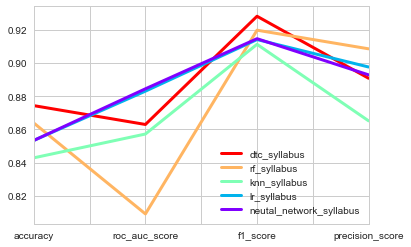

In [181]:

scores.iloc[0:4].plot(cmap = 'rainbow_r',linewidth=3)

## Logistic Regression - cross val score

In [132]:
df4_2 = df4.copy()

# train test split
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(df4_2[:762],yc1,
                                                     random_state = 29,
                                                    )

In [133]:
import sklearn.linear_model
#lr = sklearn.linear_model.LogisticRegression()
#lr.fit(X_train2, y_train2)
#lr.fit(df4_2[:762], yc1)
y_pred_lr = lr.predict(X_test2)
print lr.score(X_test2, y_test2)


0.921465968586


In [134]:
import sklearn.model_selection
accuracy_lr = sklearn.model_selection.cross_val_score(lr, df4[:762],
                                                      yc1['Band Year 9: Numeracy'], 
                                                      cv = 10,scoring = 'accuracy')
roc_auc_score_lr = sklearn.model_selection.cross_val_score(lr, df4[:762],
                                                      yc1['Band Year 9: Numeracy'], 
                                                      cv = 10,scoring = 'roc_auc')
f1_score_lr = sklearn.model_selection.cross_val_score(lr, df4[:762],
                                                      yc1['Band Year 9: Numeracy'], 
                                                      cv = 10,scoring = 'f1')
precision_score_lr = sklearn.model_selection.cross_val_score(lr, df4[:762],
                                                      yc1['Band Year 9: Numeracy'], 
                                                      cv = 10,scoring = 'precision')
precision_score_lr2 = sklearn.model_selection.cross_val_score(lr, df4[:762],
                                                      yc1['Band Year 9: Numeracy'], 
                                                      cv = 10,scoring = 'average_precision')


In [135]:
import sklearn.model_selection
accuracy_lr = sklearn.model_selection.cross_val_score(lr, X_test2, y_test2['Band Year 9: Numeracy'], 
                                                      cv = 10,scoring = 'accuracy')
roc_auc_score_lr = sklearn.model_selection.cross_val_score(lr, X_test2, y_test2['Band Year 9: Numeracy'], 
                                                      cv = 10,scoring = 'roc_auc')
f1_score_lr = sklearn.model_selection.cross_val_score(lr, X_test2, y_test2['Band Year 9: Numeracy'], 
                                                      cv = 10,scoring = 'f1')
precision_score_lr = sklearn.model_selection.cross_val_score(lr, X_test2, y_test2['Band Year 9: Numeracy'], 
                                                      cv = 10,scoring = 'precision')


In [136]:
[np.mean(accuracy_lr),
np.mean(roc_auc_score_lr),
np.mean(f1_score_lr),
np.mean(precision_score_lr)]

[0.90605263157894744,
 0.89411764705882357,
 0.94951093951093957,
 0.9145321637426902]

In [137]:
sklearn.metrics.confusion_matrix(y_test2, y_pred_lr)


array([[  9,  12],
       [  3, 167]])

In [392]:
Y_pp = pd.DataFrame(lr.predict_proba(X_test2), columns=['class_0_pp','class_1_pp'])
Y_pp['pred_class_thresh10'] = [1 if x >= 0.9 else 0 for x in Y_pp.class_1_pp.values]

In [393]:
sklearn.metrics.confusion_matrix(y_test2, Y_pp['pred_class_thresh10'])


array([[ 20,   1],
       [ 45, 125]])

### Scores analysis:

According to the scores, I will choose Logistic Regression as the model.

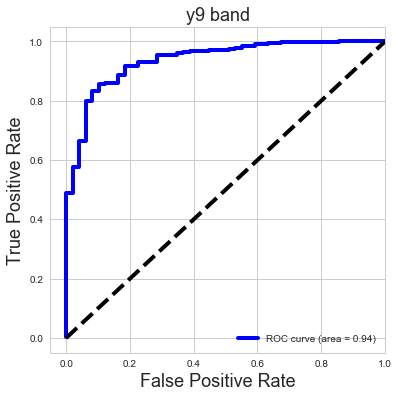

In [131]:
# ROC Plot
Y_pp = pd.DataFrame(lr.predict_proba(X_test2), columns=['class_0_pp','class_1_pp'])


from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test2, Y_pp.class_1_pp)

roc_auc = auc(fpr, tpr) 
# Plot of a ROC curve for class 1 
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4,c = 'blue')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('y9 band', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [140]:
lr_coef1 = pd.DataFrame({
    'strength': lr.coef_[0,:],
    'question': X_train2.columns
}).sort_values('strength', ascending = False)
lr_coef1

,question,strength
11,"Fractions, Decimals and Percentages",3.380297
6,Data,1.903522
16,Multiplication and Division,1.040753
17,Patterns and Algebra,1.016135
12,Indices,0.901886
21,Ratios and Rates,0.742824
20,Properties of Geometrical Figures,0.722016
2,Angles,0.713007
23,Three-Dimensional Space,0.656721
9,Financial Mathematics,0.655975


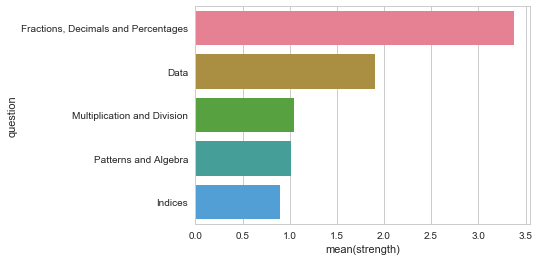

In [141]:
sns.barplot(x = 'strength', y ='question',data = lr_coef1[:5] )

In [238]:
new_columns_2016 = [syllabus_dict.get(i,0) for i in list(X_y7_2016.columns) ]
new_columns_2017 = [syllabus_dict.get(i,0) for i in list(X_y7_2017.columns) ]

# Application

In [118]:
yc1.shape

(762, 1)

In [143]:
X_y7_2016.shape,X_y7_2017.shape,X_y7_2015.shape

((206, 31), (210, 24), (186, 31))

In [144]:
y_2015_xdf = df4[576:762]
y_2016_xdf = df4[762:968]
y_2017_xdf = df4[968:]

In [145]:
y_2016_xdf.shape,y_2017_xdf.shape,y_2015_xdf.shape

((206, 30), (210, 30), (186, 30))

**2015**

In [146]:
pred_future2015= lr.predict(y_2015_xdf)

In [163]:
Y_pp2015 = pd.DataFrame(lr.predict_proba(y_2015_xdf), columns=['class_0_pp','class_1_pp'])
Y_pp2015['pred_class_thresh1'] = [1 if x >= 0.4 else 0 for x in Y_pp2015.class_1_pp.values]
Y_pp2015['pred_class_thresh2'] = [1 if x >= 0.8 else 0 for x in Y_pp2015.class_1_pp.values]
# 0.5, 0.7,0.85

In [164]:
sklearn.metrics.confusion_matrix(yc2015, pred_future2015)

array([[ 16,  14],
       [  7, 149]])

In [165]:
sklearn.metrics.confusion_matrix(yc2015, Y_pp2015['pred_class_thresh1'] )

array([[ 14,  16],
       [  3, 153]])

In [166]:
sklearn.metrics.confusion_matrix(yc2015, Y_pp2015['pred_class_thresh2'])

array([[ 26,   4],
       [ 27, 129]])

In [167]:
np.bincount(pred_future2015)

array([ 23, 163])

In [168]:
np.bincount(Y_pp2015['pred_class_thresh1'] )

array([ 17, 169])

In [169]:
np.bincount(Y_pp2015['pred_class_thresh2'] )

array([ 53, 133])

# the reason for a particlar student why is fail

In [170]:

lr.predict(y_2015_xdf.iloc[[1]])

array([ True], dtype=bool)

In [171]:
lr.intercept_

array([-6.5449182])

In [172]:
lr.predict_proba(y_2015_xdf.iloc[[1]])

array([[ 0.01226851,  0.98773149]])

In [183]:
x=4.3883749488770807
np.exp(x) / (np.exp(x)*1.0+1) 

0.98773148850072556

In [184]:
y_2015_xdf.iloc[[1]]

index,Addition and Subtraction,Algebraic Techniques,Angles,Area,Chance,Computation with Integers,Data,Data Collection and Representation,Equations,Financial Mathematics,...,Properties of Geometrical Figures,Ratios and Rates,Single Variable Data Analysis,Three-Dimensional Space,Time,Two-Dimensional Space,Volume,Volume and Capacity,Whole Numbers,y7_band
SRN,,,,,,,,,,,,,,,,,,,,,
433787013,0.5,0.333333,1.0,1.0,0.5,0.5,0.666667,0.491803,1.0,0.483498,...,0.5,1.0,0.415842,0.666667,0.5,1.0,0.942857,1.0,0.628303,0.9


In [177]:
yc2015.iloc[2]

False

In [178]:
student1 = y_2015_xdf.iloc[[1]].T
new1 = pd.merge(student1,lr_coef1,left_index=True, right_on='question')

In [179]:
new1.columns

Index([433787013, u'question', u'strength'], dtype='object')

In [180]:
new1['score'] = new1[433787013]*new1.strength

In [182]:
sum(new1.score) - 6.5449182

4.3883749488770807

In [185]:
new1.sort_values('score', ascending=False).head()

,433787013,question,strength,score
11,0.875000,"Fractions, Decimals and Percentages",3.380297,2.957760
6,0.666667,Data,1.903522,1.269015
16,0.818182,Multiplication and Division,1.040753,0.851525
21,1.000000,Ratios and Rates,0.742824,0.742824
12,0.817010,Indices,0.901886,0.736850


In [186]:
lr_coef1.head()

,question,strength
11,"Fractions, Decimals and Percentages",3.380297
6,Data,1.903522
16,Multiplication and Division,1.040753
17,Patterns and Algebra,1.016135
12,Indices,0.901886


In [187]:
all_student = pd.DataFrame(df4[:762].mean())
new2 = pd.merge(all_student,lr_coef1,left_index=True, right_on='question')
new2.columns = ['mean_Score','question','strength']

In [188]:
new2['score'] = new2.mean_Score*new2.strength
new2.sort_values('score', ascending=False).head()

,mean_Score,question,strength,score
11,0.616918,"Fractions, Decimals and Percentages",3.380297,2.085365
6,0.732940,Data,1.903522,1.395167
16,0.755603,Multiplication and Division,1.040753,0.786397
17,0.727668,Patterns and Algebra,1.016135,0.739410
12,0.817010,Indices,0.901886,0.736850


In [189]:
compare_df = new2[['question','score']]

In [190]:
student1_r = pd.merge(compare_df, new1[['question','score']],on='question')
a = student1_r[student1_r >=0].dropna()

In [191]:
a['diff'] = a.score_x - a.score_y
a.sort_values('diff',ascending=False).head()

,question,score_x,score_y,diff
17,Patterns and Algebra,0.739410,0.508068,0.231342
6,Data,1.395167,1.269015,0.126152
4,Chance,0.245543,0.168815,0.076727
0,Addition and Subtraction,0.164140,0.100916,0.063223
23,Three-Dimensional Space,0.488275,0.437814,0.050461


# predict 2016 and 2017 y7 student score

** 2016**

In [193]:
pred_future2016= lr.predict(y_2016_xdf)

In [225]:
Y_pp2016 = pd.DataFrame(lr.predict_proba(y_2016_xdf), columns=['class_0_pp','class_1_pp'])
Y_pp2016['pred_class_thresh1'] = [1 if x >= 0.5 else 0 for x in Y_pp2016.class_1_pp.values]
Y_pp2016['pred_class_thresh2'] = [1 if x >= 0.75 else 0 for x in Y_pp2016.class_1_pp.values]
Y_pp2016['pred_class_thresh3'] = [1 if x >= 0.85 else 0 for x in Y_pp2016.class_1_pp.values]
# 0.5, 0.75,0.85

In [226]:
np.bincount(pred_future2016)

array([  5, 201])

In [227]:
np.bincount(Y_pp2016['pred_class_thresh1'] )

array([  5, 201])

In [228]:
np.bincount(Y_pp2016['pred_class_thresh2'] )

array([ 17, 189])

In [229]:
np.bincount(Y_pp2016['pred_class_thresh3'] )

array([ 32, 174])

In [265]:
Y_pp2016['y7'] = list(y_2016_xdf.y7_band)

**2017**

In [214]:
pred_future2017= lr.predict(y_2017_xdf)

In [222]:
Y_pp2017 = pd.DataFrame(lr.predict_proba(y_2017_xdf), columns=['class_0_pp','class_1_pp'])
Y_pp2017['pred_class_thresh1'] = [1 if x >= 0.5 else 0 for x in Y_pp2017.class_1_pp.values]
Y_pp2017['pred_class_thresh2'] = [1 if x >= 0.75 else 0 for x in Y_pp2017.class_1_pp.values]
Y_pp2017['pred_class_thresh3'] = [1 if x >= 0.85 else 0 for x in Y_pp2017.class_1_pp.values]
# 0.5, 0.75,0.85

In [223]:
np.bincount(pred_future2017)

array([  8, 202])

In [224]:
np.bincount(Y_pp2017['pred_class_thresh1'] )

array([  8, 202])

In [218]:
np.bincount(Y_pp2017['pred_class_thresh2'] )

array([ 29, 181])

In [219]:
np.bincount(Y_pp2017['pred_class_thresh3'] )

array([ 43, 167])

In [221]:
31/210.0

0.14761904761904762

In [375]:
new_columns_2016 = [syllabus_dict.get(i,0) for i in list(X_y7_2016.columns) ]
new_columns_2017 = [syllabus_dict.get(i,0) for i in list(X_y7_2017.columns) ]

def is_band8_or_not(student_id):
    pred_p = lr.predict_proba(df4.loc[[student_id]]).tolist()[0][1]
    if pred_p >= 0.9:
        return 'Minimal Risk'
    elif pred_p >= 0.8:
        return 'Low Risk'
    elif pred_p >= 0.6:
        return 'Medium Risk'
    else:
        return 'High Risk'
    

def questions_need_improve_2016(student_id):
    student_p = df4.loc[[student_id]].T
    new_p = pd.merge(student_p,lr_coef1,left_index=True, right_on='question')
    new_p['score'] = new_p[student_id]*new1.strength
    all_student = pd.DataFrame(df4[:762].mean())
    new_p2 = pd.merge(all_student,lr_coef1,left_index=True, right_on='question')
    new_p2.columns = ['mean_Score','question','strength']
    new_p2['score'] = new_p2.mean_Score*new_p2.strength
    student_p2 = pd.merge(new_p2[['question','score']], new_p[['question','score']],on='question')
    a = student_p2[student_p2 >=0].dropna()
    a['diff'] = a.score_x - a.score_y
    new_a = a[a['question'].isin(new_columns_2016)]
    return list(new_a.sort_values('diff',ascending=False)['question'].head(3))
def questions_need_improve_2017(student_id):
    student_p = df4.loc[[student_id]].T
    new_p = pd.merge(student_p,lr_coef1,left_index=True, right_on='question')
    new_p['score'] = new_p[student_id]*new1.strength
    all_student = pd.DataFrame(df4[:762].mean())
    new_p2 = pd.merge(all_student,lr_coef1,left_index=True, right_on='question')
    new_p2.columns = ['mean_Score','question','strength']
    new_p2['score'] = new_p2.mean_Score*new_p2.strength
    student_p2 = pd.merge(new_p2[['question','score']], new_p[['question','score']],on='question')
    a = student_p2[student_p2 >=0].dropna()
    a['diff'] = a.score_x - a.score_y
    new_a = a[a['question'].isin(new_columns_2017)]
    return list(new_a.sort_values('diff',ascending=False)['question'].head(3))

In [376]:
y_2016_xdf.loc[[435890903]]

index,Addition and Subtraction,Algebraic Techniques,Angles,Area,Chance,Computation with Integers,Data,Data Collection and Representation,Equations,Financial Mathematics,...,Properties of Geometrical Figures,Ratios and Rates,Single Variable Data Analysis,Three-Dimensional Space,Time,Two-Dimensional Space,Volume,Volume and Capacity,Whole Numbers,y7_band
SRN,,,,,,,,,,,,,,,,,,,,,
435890903,0.5,0.5,0.0,0.0,0.0,0.0,0.75,1.0,0.625328,0.0,...,0.0,0.333333,0.0,0.0,0.5,0.75,0.942857,0.666667,0.333333,0.6


In [377]:
lr.predict_proba(df4.loc[[435890903]])

array([[ 0.54683268,  0.45316732]])

In [378]:
is_band8_or_not(435890903)

'High Risk'

In [379]:
questions_need_improve_2016(435890903)

['Fractions, Decimals and Percentages', 'Angles', 'Three-Dimensional Space']

In [380]:
y_2017_xdf.loc[[436615825]]

index,Addition and Subtraction,Algebraic Techniques,Angles,Area,Chance,Computation with Integers,Data,Data Collection and Representation,Equations,Financial Mathematics,...,Properties of Geometrical Figures,Ratios and Rates,Single Variable Data Analysis,Three-Dimensional Space,Time,Two-Dimensional Space,Volume,Volume and Capacity,Whole Numbers,y7_band
SRN,,,,,,,,,,,,,,,,,,,,,
436615825,1.0,0.617984,1.0,1.0,1.0,1.0,0.75,0.0,0.625328,1.0,...,0.567794,0.534686,0.0,0.0,0.5,1.0,1.0,0.5,0.628303,0.7


In [381]:
is_band8_or_not(436615825)

'Minimal Risk'

In [382]:
questions_need_improve_2017(436615825)

['Three-Dimensional Space', 'Position', 'Single Variable Data Analysis']

In [383]:
student_df_2016 = pd.DataFrame(index = ['Risk','Questions 1',
                                       'Questions 2','Questions 3'])
student_df_2016

""
Risk
Questions 1
Questions 2
Questions 3


In [384]:
y_2016_xdf.index

Index([435890202, 447613247, 435977111, 435890903, 435859500, 445177172,
       436020210, 436106246, 435861989, 441906960,
       ...
       435625428, 436126158, 435600077, 447833298, 436561679, 442691941,
       447797739, 436341342, 436799446, 436163223],
      dtype='object', name=u'SRN', length=206)

In [385]:
for student_id in y_2016_xdf.index:
    student_df_2016[student_id]= [is_band8_or_not(student_id),
                                  questions_need_improve_2016(student_id)[0],
                                  questions_need_improve_2016(student_id)[1],
                                  questions_need_improve_2016(student_id)[2]]

In [368]:
student_df_2016.T

,Risk,Questions 1,Questions 2,Questions 3
435890202,Low Risk,Angles,Three-Dimensional Space,Data
447613247,High Risk,"Fractions, Decimals and Percentages",Angles,Three-Dimensional Space
435977111,Minimal Risk,"Fractions, Decimals and Percentages",Angles,Three-Dimensional Space
435890903,High Risk,"Fractions, Decimals and Percentages",Angles,Three-Dimensional Space
435859500,Minimal Risk,Three-Dimensional Space,"Fractions, Decimals and Percentages",Patterns and Algebra
445177172,Minimal Risk,Three-Dimensional Space,Chance,Time
436020210,Minimal Risk,Data,Patterns and Algebra,"Fractions, Decimals and Percentages"
436106246,Minimal Risk,Three-Dimensional Space,Linear Relationships,Addition and Subtraction
435861989,Low Risk,"Fractions, Decimals and Percentages",Three-Dimensional Space,Properties of Geometrical Figures
441906960,Low Risk,"Fractions, Decimals and Percentages",Angles,Three-Dimensional Space


In [395]:
#student_df_2016.T.to_csv('2016_students_prediction.csv', header=True, index = True)

In [386]:
student_df_2016.T.Risk.value_counts()

Minimal Risk    163
Low Risk         19
Medium Risk      16
High Risk         8
Name: Risk, dtype: int64

In [387]:
student_df_2017 = pd.DataFrame(index = ['Risk','Questions 1',
                                       'Questions 2','Questions 3'])
student_df_2017

""
Risk
Questions 1
Questions 2
Questions 3


In [388]:
for student_id in y_2017_xdf.index:
    student_df_2017[student_id]= [is_band8_or_not(student_id),
                                  questions_need_improve_2017(student_id)[0],
                                  questions_need_improve_2017(student_id)[1],
                                  questions_need_improve_2017(student_id)[2]]

In [389]:
student_df_2017.T

,Risk,Questions 1,Questions 2,Questions 3
441410735,Minimal Risk,Three-Dimensional Space,Position,Single Variable Data Analysis
436808992,Minimal Risk,Three-Dimensional Space,Multiplication and Division,Single Variable Data Analysis
436991703,Minimal Risk,"Fractions, Decimals and Percentages",Three-Dimensional Space,Single Variable Data Analysis
448607429,High Risk,"Fractions, Decimals and Percentages",Angles,Three-Dimensional Space
437076511,Minimal Risk,Single Variable Data Analysis,Volume and Capacity,Time
437399492,Minimal Risk,Multiplication and Division,Single Variable Data Analysis,Volume and Capacity
436615825,Minimal Risk,Three-Dimensional Space,Position,Single Variable Data Analysis
444269936,Minimal Risk,"Fractions, Decimals and Percentages",Multiplication and Division,Single Variable Data Analysis
443672141,Minimal Risk,Three-Dimensional Space,Single Variable Data Analysis,Volume and Capacity
444303069,Minimal Risk,Three-Dimensional Space,Single Variable Data Analysis,Chance


In [394]:
#student_df_2017.T.to_csv('2017_students_prediction.csv', header=True, index = True)

In [391]:
student_df_2017.T.Risk.value_counts()

Minimal Risk    159
Medium Risk      17
Low Risk         17
High Risk        17
Name: Risk, dtype: int64

#  verbes columns

In [209]:
df_v = pd.concat([X_y7_2012_v,X_y7_2013_v,X_y7_2014_v,X_y7_2015_v])

In [210]:
df_v = df_v.T.fillna(df_v.T.mean()).T

In [211]:
y7band = pd.concat([band2012,band2013,band2014,band2015])
y5band = pd.concat([band2012_y5,band2013_y5,band2014_y5,band2015_y5])
df_v['y7_band'] = list(y7band/10)
#df_v['y5_band'] = list(y5band)

In [212]:
df_v.head()

,Adds,Applies,Calculates,Chooses,Compares,Completes,Continues,Converts,Counts,Describes,...,Reads,Recognises,Rounds,Selects,Solves,Subtracts,Uses,Visualises,Writes,y7_band
SRN,,,,,,,,,,,,,,,,,,,,,
436530790,1.0,0.666667,0.6250,0.553686,0.0,0.553686,0.0,0.0,0.553686,1.0,...,0.553686,0.553686,1.0,0.553686,0.500000,0.553686,1.0,0.553686,0.553686,0.7
441546149,1.0,1.000000,0.8125,0.874599,1.0,0.874599,1.0,1.0,0.874599,1.0,...,0.874599,0.874599,1.0,0.874599,0.666667,0.874599,1.0,0.874599,0.874599,0.9
432640256,1.0,0.000000,0.6875,0.456170,0.0,0.456170,0.0,0.0,0.456170,1.0,...,0.456170,0.456170,0.0,0.456170,0.666667,0.456170,1.0,0.456170,0.456170,0.7
434220173,1.0,0.666667,0.5625,0.467228,0.0,0.467228,0.0,0.0,0.467228,1.0,...,0.467228,0.467228,0.0,0.467228,0.333333,0.467228,0.5,0.467228,0.467228,0.7
431672294,1.0,1.000000,0.8125,0.786779,0.0,0.786779,1.0,1.0,0.786779,1.0,...,0.786779,0.786779,1.0,0.786779,0.500000,0.786779,1.0,0.786779,0.786779,0.9


In [213]:
# train test split
from sklearn.model_selection import train_test_split
X_train4,X_test4,y_train4,y_test4 = train_test_split(df_v,yc1,
                                                    random_state = 233)

## Logistic Regression

In [214]:
import sklearn.linear_model
lr = sklearn.linear_model.LogisticRegression()
lr.fit(X_train4, y_train4)
y_pred = lr.predict(X_test4)
print lr.score(X_test4, y_test4)

0.869109947644


In [217]:

from sklearn.metrics import f1_score
print f1_score(y_test4, y_pred)
from sklearn.metrics import average_precision_score
print average_precision_score(y_test4, y_pred)

0.925373134328
0.940321148093


In [218]:
import sklearn.metrics 
sklearn.metrics.confusion_matrix(y_test4, y_pred)

array([[ 11,  20],
       [  5, 155]])

In [219]:
dfv_s = pd.DataFrame({
    'strength': lr.coef_[0,:],
    'question': X_train4.columns
}).sort_values('strength', ascending = False)

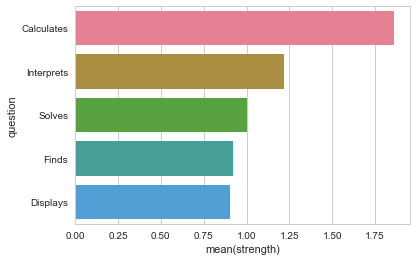

In [220]:
sns.barplot(x = 'strength',y = 'question',data = dfv_s[:5])